# Classificaion


What if target ($y$) is Yes or No?
i.e., a binary problem.


[Reference](https://github.com/nborwankar/LearnDataScience/blob/master/notebooks/B3.%20Logistic%20Regression%20-%20Analysis.ipynb)

In [1]:
# @title
import datetime
print(datetime.datetime.now())

2024-03-04 05:24:08.763790


## Logistic Regression

### NFL Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

scores = [3,11,12,13,20,22,21,25, 26,27,28,29,30,31,33,35,37,41,42,43]
outcomes = [0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1]

def nfl_outcomes(rline = False):
    global scores, outcomes
    figsize = (8, 5)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    line = ax.plot(scores,outcomes,'o')[0]
    if rline:
        x = np.arange(5,50,5)
        y = (1.1/30.)*x-0.3
        line2 = ax.plot(x,y)
    ax.set_title('Win/Loss Outcomes for an NFL team')
    ax.set_xlabel('Score')
    ax.set_ylabel('Proability of a Win')
    ax.set_ylim((-0.1,1.1))
    ax.grid(True)
    #line.set_marker('o')
    return ax,fig

(<Axes: title={'center': 'Win/Loss Outcomes for an NFL team'}, xlabel='Score', ylabel='Proability of a Win'>,
 <Figure size 800x500 with 1 Axes>)

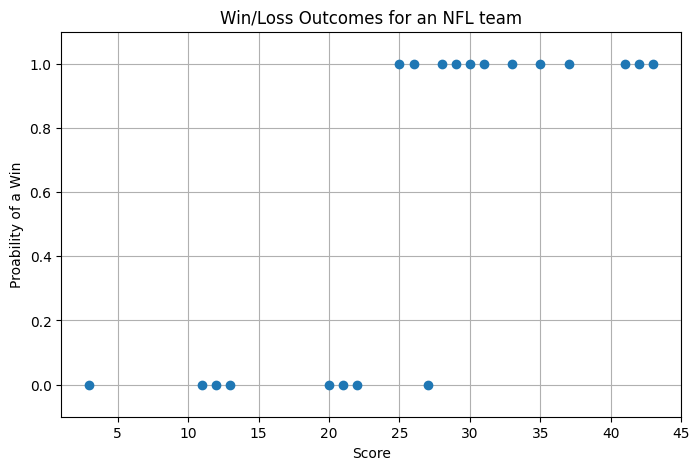

In [3]:
nfl_outcomes()

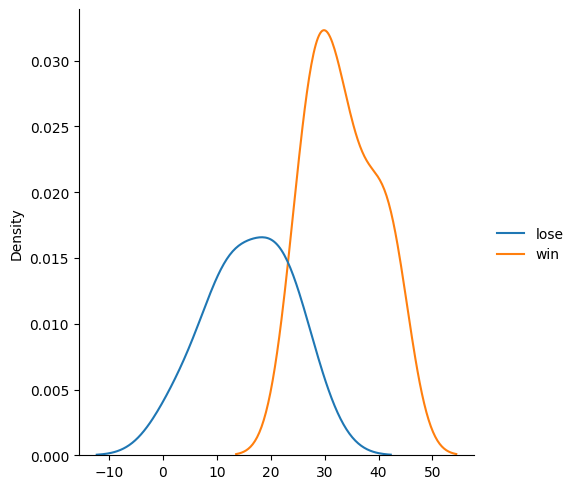

In [4]:
import seaborn as sns
data_w = [s for s,o in zip(scores,outcomes) if o == 1]
data_l = [s for s,o in zip(scores,outcomes) if o == 0]
sns.displot({"lose":data_l, "win":data_w}, kind="kde")

(<Axes: title={'center': 'Win/Loss Outcomes for an NFL team'}, xlabel='Score', ylabel='Proability of a Win'>,
 <Figure size 800x500 with 1 Axes>)

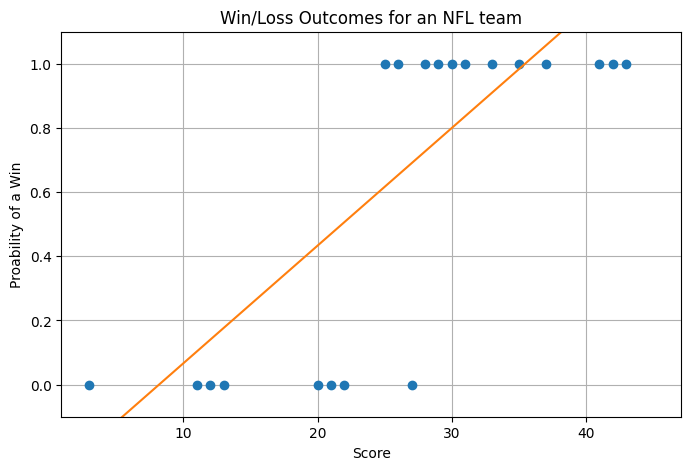

In [5]:
nfl_outcomes(True)

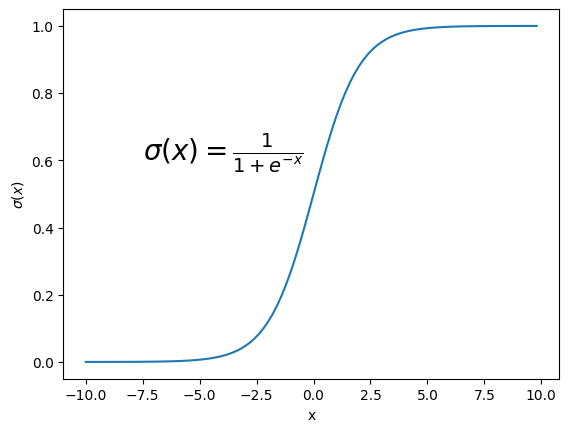

In [6]:
import math

def sigmoid(x):
    return 1/(1+math.exp(-x))

x = np.arange(-10., 10., 0.2)
y = list(map(sigmoid, x))

plt.plot(x, y)
plt.text(-7.5, 0.6, r'$\sigma(x) = \frac{1}{1+e^{-x}}$', fontsize=20)
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.show()

How do we model this kind of data? i.e., binary classification, and some training data is overlapped.

What is the best curve that has minimal error?

We cannot use a 'line' to fit data, rather we would like to use a curve to model "X" and "Probability".

<b>A binary classification problem can be represented as "what is the probability of being in class 1 (rather than class 0), givn by the observed features"? If we fine-tune (e.g., slope, intercept, left/right moving) the shap of the above z (or s) shape curve, we can say that there exists a data point ($X$), which its probabiltiy of being in class 1 is $\sigma(x)$, used as a threshold to classify class 1 and 0.</b>

**Probability**: How possible an event (success, Y=1) will occur, e.g., 75%? $P(Y=1) = .75; P(Y=0) = .25$

$\Rightarrow$ No 'score' random variable in $P()$. We might need something like this $P(Y=1|X=x)$.


**Odds(win)**: Expressed the odds of success $\frac{P(Y=1)}{P(Y=0)}$ $\Rightarrow$ .75/.25 = 3

And Odds(lose) = .25/.75 = 0.33 (or we usually say 'the odds of lose are 1 to 3')

It is three times more likely that I will win than lose.
The higher the odds, the more likely ‘success’ will occur.

Let $p = P(Y=1)$, odd = $\frac{p}{1-p}$.

See figure below. However, the curve looks strange.

**Log Odds**: Log of the Odd (natural log), aka $logit$, e.g., $\ln \frac{.75}{.25} = 1.098$

$logit(p) = \ln(odds) = \ln \frac{p}{1-p}$

This calculation is used to map the result between negative infinity to infinity. (Hint: In regression, it is easiest to model unbounded outcomes.)

The logit transformation allows for a linear relationship between the response variable and the coefficients, i.e., $logit(p) = aX +b$.

<b>This means that the coefficients in a simple logistic regression are in terms of the log odds, that is, the coefficient $a$ implies that a one unit change in $X$ results in a $a$ unit change in the log of the odds.</b>

The inverse shape of logit seems like what we woild like to find. Not odd. Another reason is that logit is symmetry.

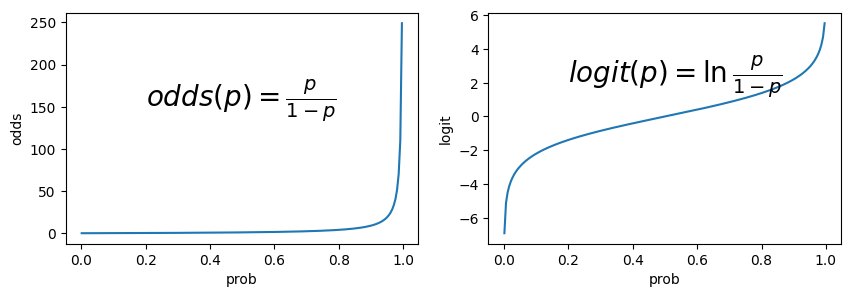

In [7]:
def logit(p):
    return np.log(p/(1-p))

p = np.arange(0.001, 0.999, 0.005)
y = list(map(logit, p))
odd = list(map(lambda p: p/(1-p), p))

fig = plt.figure(figsize=(10,3))
ax_l = fig.add_subplot(121)
ax_r = fig.add_subplot(122)

ax_l.plot(p, odd, label = "odds")
ax_r.plot(p, y, label = "logit")

ax_l.text(0.2, 150, r'$odds(p) = \frac{p}{1-p}$', fontsize=20)
ax_l.set_xlabel('prob')
ax_l.set_ylabel('odds')

ax_r.text(0.2, 2, r'$logit(p) = \ln \frac{p}{1-p}$', fontsize=20)
ax_r.set_xlabel('prob')
ax_r.set_ylabel('logit')
plt.show()

$logit(p) = \ln \frac{p}{1-p}$

Let's try inverse the above logit function! (Hint: 'Reversing' a figure can be simply done by exchange $x$ and $y$.)

$\Rightarrow$ $x = \ln \frac{y}{1-y}$

and ...

$e^x = \frac{y}{1-y}$

$e^x (1-y) = y$

$e^x - e^{x}y = y$

$e^x = y (1+e^x)$

$y = \frac{e^x}{1+e^x}$

$y = \frac{1}{e^{-x}+ 1} = \frac{1}{ 1+ e^{-x}} $

The above function is called sigmod function or logistic function. Usually, we denote it as follows.

$\sigma(z) = \frac{1}{1+e^{-z}}$

Suppose we want to build a Logistic Regression model to predict whether a team would win or lose given certain game-related variables, such as scores of two teams and number of touch downs. To be exact, we want a model that outputs the probability (a number between 0 and 1) that a team wins. A value of 1 implies that the team is guaranteed (from the perspective of probability) to win whereas a value of 0 implies that the team will lose.

$\sigma(z)$ looks good.

where $z$ is the equation for a line. $x_i$ are (game-related) variables. These variables affect the value of $z$, and $z$ then maps to a probability that a team wins.

Note that we **assume** $z$ is linear to $x_i$, just like what we did in linear regression model. You can assume they are non-liner, but now we assume their relation is linear.

$ z = \sum_{i}{w_i x_i} +b$


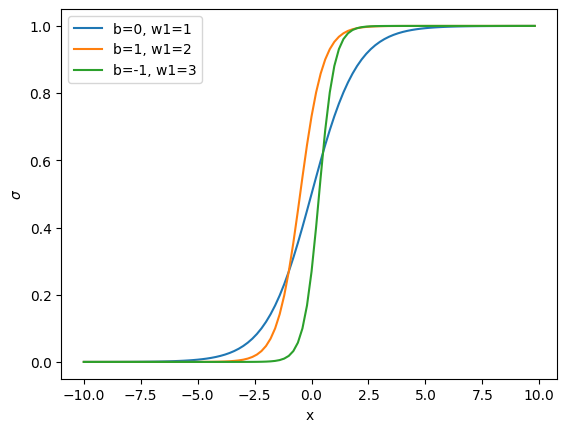

In [8]:
x = np.arange(-10., 10., 0.2)
y1 = list(map(lambda x: 1/(1+math.exp(-(1*x+0))), x)) # b=0, w1=1
y2 = list(map(lambda x: 1/(1+math.exp(-(2*x+1))), x)) # b=1, w1=2
y3 = list(map(lambda x: 1/(1+math.exp(-(3*x-1))), x)) # b=-1, w1=3

plt.plot(x, y1, label='b=0, w1=1')
plt.plot(x, y2, label='b=1, w1=2')
plt.plot(x, y3, label='b=-1, w1=3')
plt.xlabel('x')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

### Math


#### Fit a curve

The question that we would like to ask is: what is the probability of Y=1 (i.e, success or win) if we have $X=x$, i.e., $P(Y=1|X=x)$. (x is a vector that represents all variables.)

Given lots of traning data, could we find a best curve to fit the data?

Assume there is a function $f$ with parameter $\theta$,

There should be an optmized $\theta^*$ (i.e., all parameters $w_i^*$ and $b^*$) that can best fit the training data.

---

Now,

We want to use the curve of $\frac{1}{1+e^{-(\theta^T x)}}$ to approach $P(Y=1|X=x)$.

(Of course, you can choose any function, but we **chose** sigmoid here. Because the curve looks promising.)

Let $ z = \sum_{i}{w_i x_i} +b$, and $\theta$ is the vector of all $w_i$ and $b$.

$\sigma (z) = \sigma (\sum_{i}{w_i x_i} +b) = \sigma(\theta^T x)$


Find a $f_{\theta^*}(x) = \hat{y}= \frac {1}{1+e^{-z}} \approx  P(Y=1|X=x) = y$

also $1 - f_{\theta^*}(x) = 1 - \hat{y}= \frac {e^{-z}}{1+e^{-z}} \approx P(Y=0|X=x) = 1-y $

Q: how did you do while using MSE to find $\theta^*$? Why do we NOT use MSE to find $\theta^{*}$?
https://rohanvarma.me/Loss-Functions/

#### Loss Function, Maximum Likelihood Estimation

$P(Y=1| X= x) = f_\theta(x)$

$P(Y=0| X= x) = 1 - f_\theta(x)$

We can combine these two cases into one expression.

$P(Y|x) = [f_\theta(x)]^{y} * [1 -f_\theta(x)]^{(1-y)}]$

Invoking our assumption that the data are independent and identically distributed, we can write down the likelihood by simply taking the product across the $n$ data.

$L(x,y) = \prod_{i=1}^n f_{\theta}(x_i)^{y_i}*(1-f_{\theta}(x_i))^{1-y_i}$

$\theta^* = \mathop{\arg \max}_{\theta} L(x,y)$

It is not trival to find $\theta^*$ from $L$, so we take the log of $L$ to simplify it, and invert it to obtain the loss function (a.k.a. cross entropy loss).

$\implies \theta^* = \mathop{\arg \min}_{\theta} -\ln L(x,y)$

$-\ln L(x,y) = - \sum_{i=1}^{n} [{y}_i \ln f_{\theta}(x_i) + (1-{y}_i)\ln(1- f_{\theta}(x_i))]$

$= - \sum_{i=1}^{n} [{y}_i \ln \hat{y}_i + (1-{y}_i)\ln(1- \hat{y}_i)]$  $\Rightarrow$ [.]

and ...

$ = - \sum_{i=1}^{n} [{y}_i \ln \hat{y}_i + \ln(1- \hat{y}_i) - {y}_i  \ln(1- \hat{y}_i) ]$

$ = - \sum_{i=1}^{n} \{{y}_i [\ln \hat{y}_i - \ln(1- \hat{y}_i)] + \ln(1- \hat{y}_i) \}$

$= - \sum_{i=1}^{n} [{y}_i \ln \frac{\hat{y}_i} {1- \hat{y}_i} + \ln(1- \hat{y}_i) ]$

$= - \sum_{i=1}^{n} [{y}_i \theta^T x_i  - \ln(e^{\theta^{T} x_i} +1) ]$

$= \sum_{i=1}^{n} [ - {y}_i \theta^T x_i  + \ln(e^{\theta^{T} x_i} +1) ]$


p.s.1. $\ln \frac{\hat{y}} {1- \hat{y}} = \ln \frac{1}{e^{-z}} = -\ln e^{-z} = z = \theta^T x $

p.s.2. $\ln(1- \hat{y}) = \ln \frac {e^{-z}}{1+e^{-z}} = \ln \frac {1}{e^z+1} = - \ln (e^{z}+1) = - \ln(e^{\theta^{T} x} +1) $

---


Note that [.] is the cross-entropy of two distributions $p$ and $q$. $p \in \{y, 1-y\}$ and $q \in \{\hat{y}, 1-\hat{y}\}$. $q$ is an estimated probability distribution, $p$ is the true distribution.

We can use cross entropy to get a measure of dissimilarity between $p$ and $q$:

$H(p,q) = - \sum_{i} p_i \log q_i$


Question: Given lots of (x,y), how do we get $\theta^{*}$?

Hint: GD and (R)MSE.

\* You may skip the following partial differentiation.


$\frac{\partial \ (-\ln L(\theta))}{\partial \theta} = \frac{\sum_{i=1}^{n} \ [ - {y}_i \theta^T x_i  + \ln(e^{\theta^{T} x_i} +1) ]}{\partial \theta}$

$ = \sum_{i=1}^{n} [\frac{\partial (-{y}_i \theta^T x_i)}{\partial \theta}  + \frac{\partial (\ln(e^{\theta^{T} x_i} +1)) }{\partial \theta}] $

$ = \sum_{i=1}^{n} [ -y_i x_i  + \frac{1}{e^{\theta^{T} x_i} +1} \frac{\partial (e^{\theta^{T} x_i} +1) }{\partial \theta}] $

$ = \sum_{i=1}^{n} [ -y_i x_i  + \frac{1}{e^{\theta^{T} x_i} +1} (e^{\theta^{T} x_i}) x_i ] $

$ = \sum_{i=1}^{n} [ -y_i x_i  + \frac{e^{\theta^{T} x_i}}{e^{\theta^{T} x_i} +1}  x_i ] $

$ = \sum_{i=1}^{n} [ -y_i x_i  + \hat{y}_i  x_i ] $

$ = \sum_{i=1}^{n}  (\hat{y}_i -y_i) x_i $

So that GD ...

$\theta^{(t+1)} = \theta^{(t)} + \gamma \frac{\partial \ (-\ln L(\theta))}{\partial \theta} = \theta^{(t)} + \gamma \sum_{i=1}^{n}  (\hat{y}_i -y_i) x_i $

### Multiple Variables (2D): NFL

In [9]:
# assume only one variable x
df = pd.DataFrame([scores, outcomes]).T
df.columns = ['score', 'win']
df

,score,win
0,3,0
1,11,0
2,12,0
3,13,0
4,20,0
5,22,0
6,21,0
7,25,1
8,26,1
9,27,0


In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# You MUST read the document before using it.

from sklearn.linear_model import LogisticRegression
X_train = df[['score']] # <-- only one vaiable, i.e., z = w*score+b
y_train = df['win']

logisticRegModel = LogisticRegression().fit(X_train, y_train)

In [11]:
# print the intercept and coefficients
print("Intercept is ", logisticRegModel.intercept_)
print("coefficients  is ", logisticRegModel.coef_)

# print with feature name
print()
print("z = ")
for c,f in zip(logisticRegModel.coef_[0], X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", logisticRegModel.intercept_[0])

Intercept is  [-15.98748399]
coefficients  is  [[0.64275411]]

z = 
 +0.6427541055934933 * score
 -15.987483993013486


In [12]:
print(logisticRegModel.predict(X_train))

# Probability estimates for [lose, win]
print(logisticRegModel.predict_proba(X_train))

# Return the mean accuracy on the given test data and labels.
print(logisticRegModel.score(X_train, y_train))

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[9.99999216e-01 7.83713388e-07]
 [9.99865953e-01 1.34046623e-04]
 [9.99745113e-01 2.54887154e-04]
 [9.99515390e-01 4.84610371e-04]
 [9.58209680e-01 4.17903205e-02]
 [8.63761972e-01 1.36238028e-01]
 [9.23412897e-01 7.65871035e-02]
 [4.79669054e-01 5.20330946e-01]
 [3.26485772e-01 6.73514228e-01]
 [2.03124906e-01 7.96875094e-01]
 [1.18195435e-01 8.81804565e-01]
 [6.58421591e-02 9.34157841e-01]
 [3.57383211e-02 9.64261679e-01]
 [1.91166609e-02 9.80883339e-01]
 [5.36008208e-03 9.94639918e-01]
 [1.48788639e-03 9.98512114e-01]
 [4.11858853e-04 9.99588141e-01]
 [3.15018010e-05 9.99968498e-01]
 [1.65652239e-05 9.99983435e-01]
 [8.71076223e-06 9.99991289e-01]]
0.95


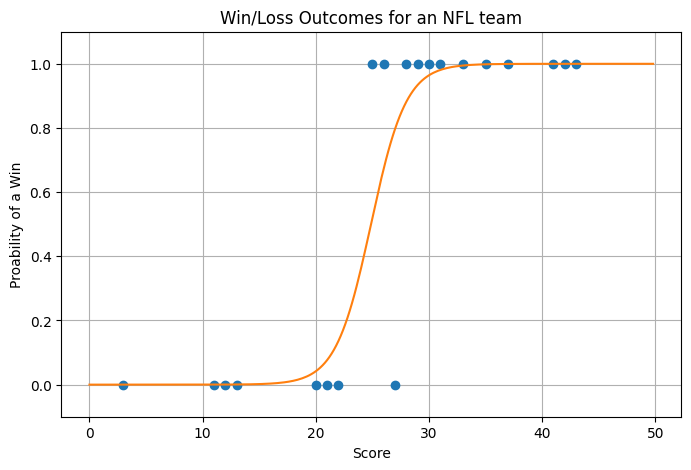

In [13]:
figsize = (8, 5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# data
line = ax.plot(scores, outcomes,'o')[0]

#curve
x = np.arange(0, 50., 0.2)
y = list(map(sigmoid, (logisticRegModel.coef_[0][0]* x) + logisticRegModel.intercept_[0]))
curve = ax.plot(x,y)

ax.set_title('Win/Loss Outcomes for an NFL team')
ax.set_xlabel('Score')
ax.set_ylabel('Proability of a Win')
ax.set_ylim((-0.1, 1.1))
ax.grid(True)
plt.show()

Question: what is the value of score when $P(Y=1|x) = .5$? $x = 24.87340626$

How to get this value? Hint: $P(Y=1|x) = .5 \implies$ $odd = 1.0$.

### Mutiple Variables (3D): Iris

In [14]:
from sklearn import datasets
iris = datasets.load_iris()

In [15]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = pd.Series(iris['target'], dtype=int)
iris_target = "virginica" # <------------------ Y = 'virginica'
iris_df[iris_target] = iris_df['target'] == 2
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,virginica
0,5.1,3.5,1.4,0.2,0,False
1,4.9,3.0,1.4,0.2,0,False
2,4.7,3.2,1.3,0.2,0,False
3,4.6,3.1,1.5,0.2,0,False
4,5.0,3.6,1.4,0.2,0,False


In [16]:
iris_var_li = ["petal length (cm)", "petal width (cm)"] # <-- only use two vars
log_reg = LogisticRegression(C=1e9, random_state=42)
log_reg.fit(iris_df[iris_var_li], iris_df[iris_target])

LogisticRegression(C=1000000000.0, random_state=42)

In [17]:
log_reg.coef_, log_reg.intercept_

(array([[ 5.75452048, 10.446811  ]]), array([-45.2724826]))

In [18]:
# Make a grid among vars
x0_min, x0_max = iris_df[iris_var_li[0]].min(), iris_df[iris_var_li[0]].max()
x1_min, x1_max = iris_df[iris_var_li[1]].min(), iris_df[iris_var_li[1]].max()

grid_step = 100
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, grid_step),
                     np.linspace(x1_min, x1_max, grid_step))

x_grid = np.c_[x0.flatten(), x1.flatten()]

In [19]:
y_proba = log_reg.predict_proba(x_grid)
print("the prob [,] means [is", iris_target, ', not', iris_target,"]")
print("first predict prob in grid is", y_proba[0])

the prob [,] means [is virginica , not virginica ]
first predict prob in grid is [1.00000000e+00 1.95553842e-17]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


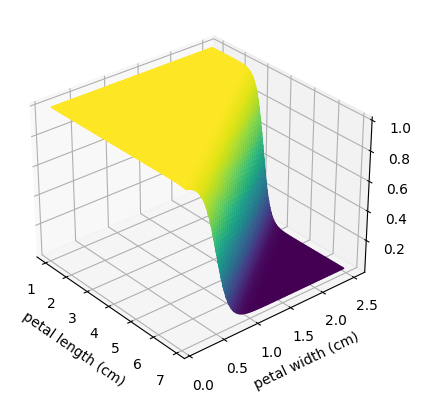

In [20]:
from mpl_toolkits.mplot3d import axes3d

Z = np.array(y_proba[:, 0]).reshape(grid_step, grid_step)

# color_setting
from matplotlib import cm
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(Z)
rc, cc, _ = colors.shape
# end_of_color_setting

fig_3d = plt.figure()
ax = fig_3d.add_subplot(111, projection='3d')
surface = ax.plot_surface(x0, x1, Z, rcount=rc, ccount=cc, facecolors=colors, shade=False)
ax.set_xlabel(iris_var_li[0])
ax.set_ylabel(iris_var_li[1])
ax.set_zlabel('$Prob(Y=|x)$')

# rotate the view
ax.view_init(azim = -40) # degree
plt.show()

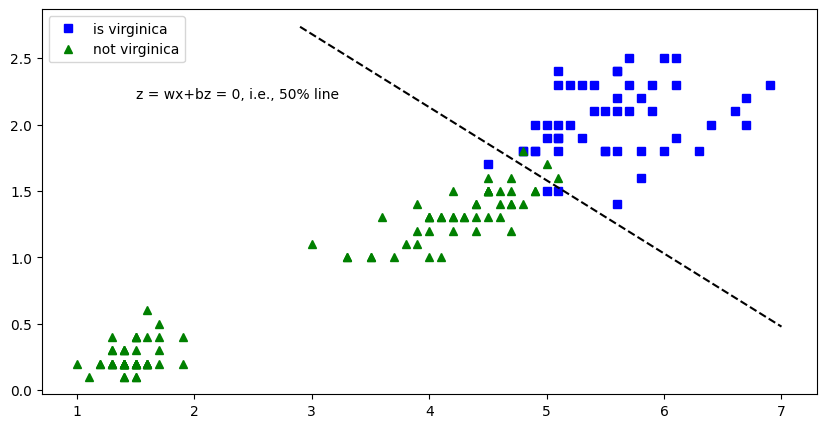

In [21]:
plt.figure(figsize=(10,5))

# is target, blue square
_i0 = iris_df[iris_df[iris_target] == True][iris_var_li[0]]
_i1 = iris_df[iris_df[iris_target] == True][iris_var_li[1]]
plt.plot(_i0, _i1, 'bs', label= 'is '+iris_target)

# not target, green triangle
_j0 = iris_df[iris_df[iris_target] == False][iris_var_li[0]]
_j1 = iris_df[iris_df[iris_target] == False][iris_var_li[1]]
plt.plot(_j0, _j1, 'g^', label= 'not '+iris_target)

# the 50% line
left_right = np.array([2.9, 7]) # given two x_0[0], x_0[1]
boundary = (0-log_reg.intercept_[0]-log_reg.coef_[0][0]*left_right)/log_reg.coef_[0][1] # find two x_1[0], x_1[1]
plt.plot(left_right, boundary, 'k--') # draw a line using two points (x_0[0], x_1[0]) and (x_0[1], x_1[1])
plt.text(1.5, 2.2, 'z = wx+bz = 0, i.e., 50% line')

plt.legend()
plt.show()

Question: can you draw the 75% and 25% lines on the figure?

In [22]:
xx, yy = np.mgrid[1.00:7.0:0.1, 0.0:3.0:0.1]

def pz(x_1, x_2, intercept, coef_1, coef_2):
  z = coef_1 * x_1 + coef_2 * x_2 + intercept
  return 1/(1+math.exp(-1*z))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = np.array(list(map(lambda x: pz(x[0],x[1], log_reg.intercept_, log_reg.coef_[0][0], log_reg.coef_[0][1]), grid))).reshape(xx.shape)

<ipython-input-22-4ef4e53758c7>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-1*z))


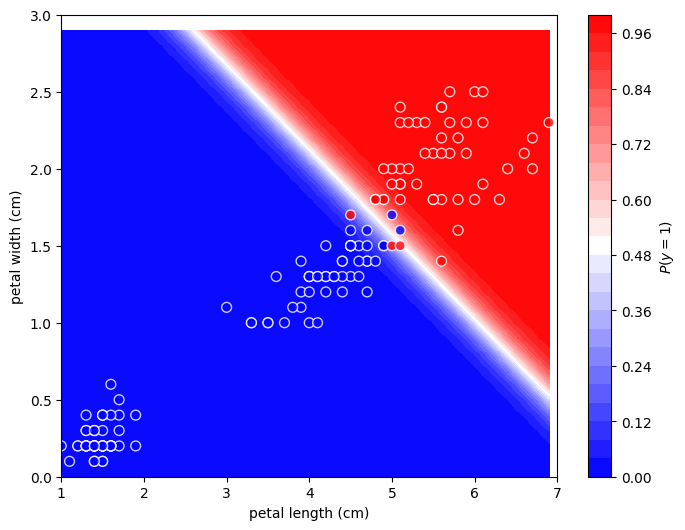

In [23]:
# fig
f, ax = plt.subplots(figsize=(8, 6))
# color
contour = ax.contourf(xx, yy, probs, 25, cmap="bwr", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")

ax.scatter(iris_df[iris_var_li[0]], iris_df[iris_var_li[1]],
           c = list(map(lambda a: 1.0 if a==True else 0.0, iris_df[iris_target])), s=50,
           cmap="bwr", alpha = 0.8,
           edgecolor="white", linewidth=1)

ax.set(#aspect="equal",
       xlim=(1, 7), ylim=(0, 3),
       xlabel=iris_var_li[0], ylabel=iris_var_li[1])

plt.show()

## KDDCUP99


The KDD Cup 1999 dataset has become a popular benchmark for data mining algorithms, and has been used in numerous research papers and textbooks. The winning team's solution achieved an accuracy of 95.8% on the test set.

The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, and good connections.


[KDD Cup 1999 Data](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

In [24]:
# Since sklearn has built-in kddcup99 dataset,
# we obtain data directly by sklearn function.
# For simplicity, we use 10% of data.

import numpy as np

from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split

X, y = fetch_kddcup99(
    subset="SA", percent10=True, random_state=42, return_X_y=True, as_frame=True
)
y = (y != b"normal.").astype(np.int32)
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

n_samples, anomaly_frac = X.shape[0], y.mean()
print(f"{n_samples} datapoints with {y.sum()} anomalies ({anomaly_frac:.02%})")

10065 datapoints with 338 anomalies (3.36%)


In [25]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
26890,0,b'tcp',b'http',b'SF',289,498,0,0,0,0,...,77,255,1.0,0.0,0.01,0.03,0.0,0.0,0.0,0.0
35471,1,b'tcp',b'smtp',b'SF',829,329,0,0,0,0,...,137,157,0.46,0.05,0.01,0.01,0.01,0.0,0.0,0.0
37027,0,b'tcp',b'http',b'SF',305,2698,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80164,2630,b'udp',b'other',b'SF',145,105,0,0,0,0,...,255,1,0.0,0.85,1.0,0.0,0.0,0.0,0.0,0.0
73649,0,b'tcp',b'ftp_data',b'SF',567,0,0,0,0,0,...,129,99,0.39,0.05,0.39,0.02,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75958,2334,b'udp',b'other',b'SF',146,105,0,0,0,0,...,255,2,0.01,0.7,0.98,0.0,0.0,0.0,0.0,0.0
57847,0,b'tcp',b'http',b'SF',211,1429,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43055,0,b'tcp',b'http',b'SF',224,8422,0,0,0,0,...,255,255,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0
48714,0,b'tcp',b'http',b'SF',274,4841,0,0,0,0,...,53,255,1.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0


In [26]:
X.service.value_counts()

b'http'        6252
b'smtp'         904
b'private'      781
b'domain_u'     596
b'other'        578
b'ftp_data'     375
b'ecr_i'        286
b'finger'        50
b'urp_i'         50
b'ntp_u'         44
b'eco_i'         39
b'ftp'           37
b'auth'          25
b'telnet'        25
b'pop_3'          9
b'time'           5
b'IRC'            3
b'urh_i'          2
b'domain'         1
b'X11'            1
b'name'           1
b'csnet_ns'       1
Name: service, dtype: int64

In [27]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [28]:
y

26890    0
35471    0
37027    0
80164    0
73649    0
        ..
75958    0
57847    0
43055    0
48714    0
95188    0
Name: labels, Length: 10065, dtype: int32

In [29]:
y.value_counts()

0    9727
1     338
Name: labels, dtype: int64

### Sample Data

srv_count: number of connections to the same service as the current connection in the past two seconds

In [30]:
df = X.copy()
df['y'] = y
df = df[df.srv_count>200]
df = df[df.srv_count<500]

In [31]:
x_df = df[['srv_count']]
y_ser = df['y']

In [32]:
from sklearn.linear_model import LogisticRegression

KDD_Model = LogisticRegression().fit(x_df, y_ser)

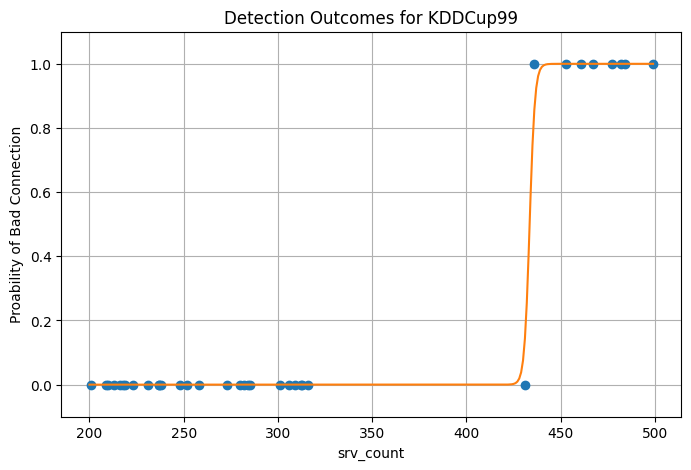

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pdss

figsize = (8, 5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
line = ax.plot(x_df['srv_count'], y_ser,'o')[0]

#curve
x = np.arange(200, 500., 1)
y = list(map(sigmoid, (KDD_Model.coef_[0][0]* x) + KDD_Model.intercept_[0]))
curve = ax.plot(x,y)

ax.set_title('Detection Outcomes for KDDCup99')
ax.set_xlabel('srv_count')
ax.set_ylabel('Proability of Bad Connection')
ax.set_ylim((-0.1,1.1))
ax.grid(True)

In [34]:
m_li = ['srv_count', 'count']  # <-- multi-vaiable, i.e., z = W*X+b
mX_train = df[m_li]
my_train = df['y']

mlogisticRegModel = LogisticRegression().fit(mX_train, my_train)

In [35]:
# print the intercept and coefficients
print("Intercept is ", mlogisticRegModel.intercept_)
print("coefficients are ", mlogisticRegModel.coef_)

# print with feature name
print()
print("z = ")
for c,f in zip(mlogisticRegModel.coef_[0], mX_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", mlogisticRegModel.intercept_[0])

coeff = (mlogisticRegModel.coef_[0][0],
         mlogisticRegModel.coef_[0][1],
         mlogisticRegModel.intercept_[0])

Intercept is  [-397.58632002]
coefficients are  [[0.45857861 0.45857549]]

z = 
 +0.45857861236125425 * srv_count
 +0.4585754893906593 * count
 -397.58632002171737


In [36]:
def pz(srv_count, count, coeff):
    # compute the linear expression by multipyling the inputs by their respective coefficients.
    # note that the coefficient array has the intercept coefficient at the end
    z = coeff[0]*srv_count + coeff[1]*count + coeff[2]
    return 1/(1+math.exp(-1*z))

In [37]:
xx, yy = np.mgrid[200:500:10, 0:512:8]

grid = np.c_[xx.ravel(), yy.ravel()]
probs = np.array(list(map(lambda z: pz(z[0],z[1],coeff), grid))).reshape(xx.shape)

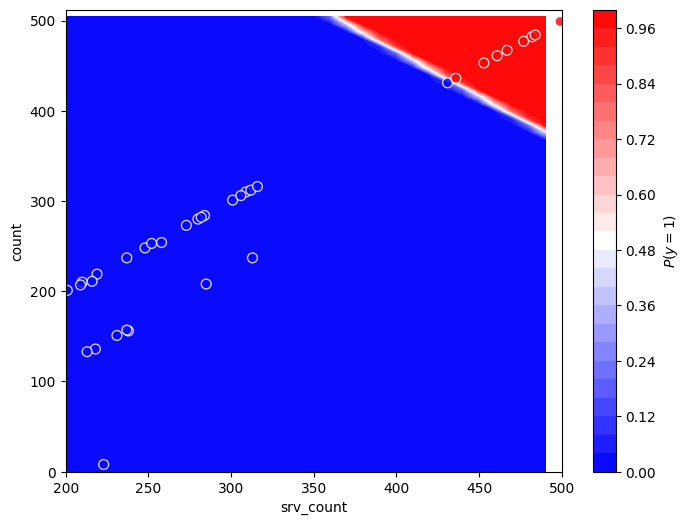

In [38]:
# fig
f, ax = plt.subplots(figsize=(8, 6))
# color
contour = ax.contourf(xx, yy, probs, 25, cmap="bwr", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")

ax.scatter(mX_train[m_li[0]], mX_train[m_li[1]],
           c = list(map(lambda a: 1.0 if a==True else 0.0, my_train)), s=50,
           cmap="bwr", alpha = 0.8,
           edgecolor="white", linewidth=1)

ax.set(#aspect="equal",
       xlim=(200, 500), ylim=(0, 512),
       xlabel=m_li[0], ylabel=m_li[1])

plt.show()

Note: the white line is called "decision boundary". Guess what? This line is exactly $\theta^T X = 0$.

## Support Vector Machine (SVM)

ref:
* https://www.youtube.com/watch?v=3liCbRZPrZA
* https://zhuanlan.zhihu.com/p/22400898
* http://www.cmlab.csie.ntu.edu.tw/~cyy/learning/tutorials/SVM2.pdf
* https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

$y \in \{+1, -1\}$

## Linear SVM


We simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes ($y\in\{+1, -1\}$) from each other.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

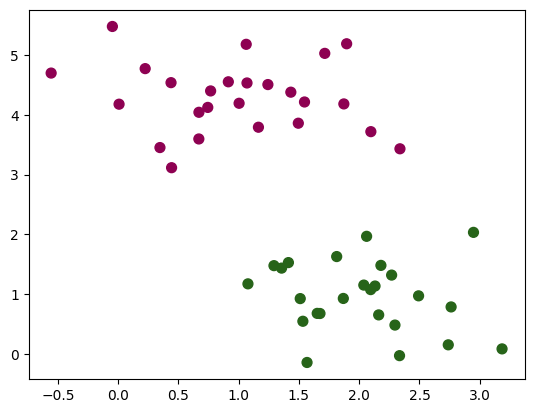

In [40]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'PiYG', c = y)
plt.show()

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. But we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

Support vector machines: rather than drawing a zero-width line between the classes, we can draw around each line a **margin** of some **width**, up to the nearest point.

SVM: we find the line with maximal margin.

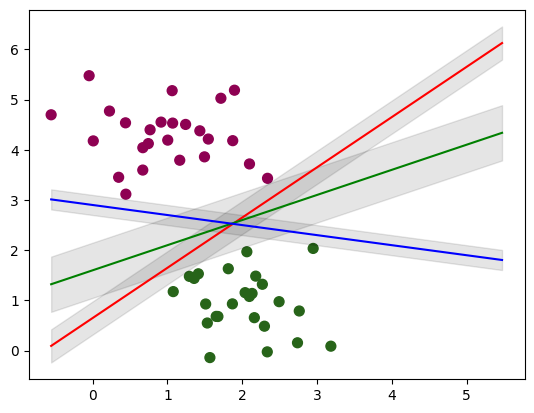

In [41]:
# @title
# data
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'PiYG', c = y)

# lines
xfit = np.linspace(X.min(), X.max())
for a, b, c, d in [
    (1, 0.65, 'r', 0.33),
     (0.5, 1.6, 'g', 0.55),
      (-0.2, 2.9, 'b', 0.2)]:
  yfit = a * xfit + b
  plt.plot(xfit, yfit, '-'+c) #line
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='k', alpha=0.1)

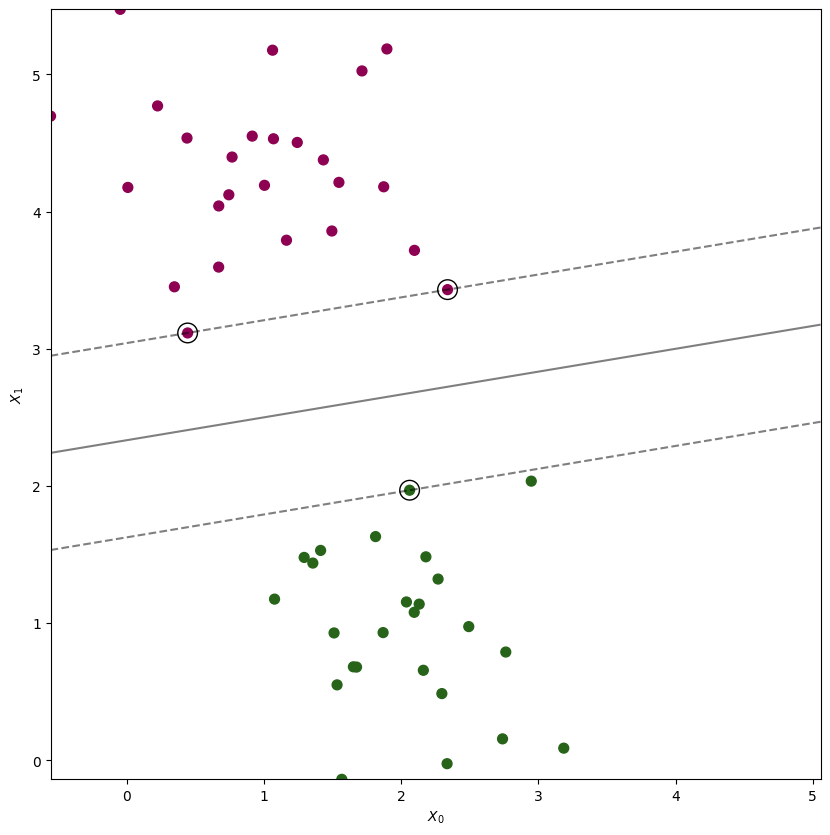

In [42]:
# @title
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

# You may want to skip the codes/equations in this cell.
# Certain concepts will be introduced in the latter cell.

from sklearn.svm import SVC # "Support vector classifier"
svc_m = SVC(kernel='linear', C=1E10)
svc_m.fit(X, y)

# figure
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.set_xlabel('$X_0$')
ax.set_ylabel('$X_1$')
x0_max, x0_min = X[:, 0].max(), X[:, 0].min()
x1_max, x1_min = X[:, 1].max(), X[:, 1].min()
axis_len = max(x0_max-x0_min, x1_max-x1_min)
ax.set_xlim(x0_min, x0_min + axis_len)
ax.set_ylim(x1_min, x1_min + axis_len)

# data
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'PiYG', c = y)

# support vectors
plt.scatter(svc_m.support_vectors_[:, 0],
            svc_m.support_vectors_[:, 1],
            s=200, linewidths=1, edgecolor='k', facecolor="none")

# make a grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)

# xy = [[x0, y0],[x1, y1], [x3, y3], ...]
xy = np.vstack((XX.ravel(), YY.ravel())).T # ps vstack needs a tuple ()
# xy = np.array(list(zip(XX.ravel(), YY.ravel()))) # same as above line

# contour height = the distance of a point to separating hyperplane
Z = svc_m.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins by contour
# we only show three levels (i.e., lines)
# 0 means the points 'on' the separating hyperplane
# -1/+1 are the points -1/+1 unit away from separating hyperplane
# by definition of SVM, points on -1/+1 are support vectors
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.show()

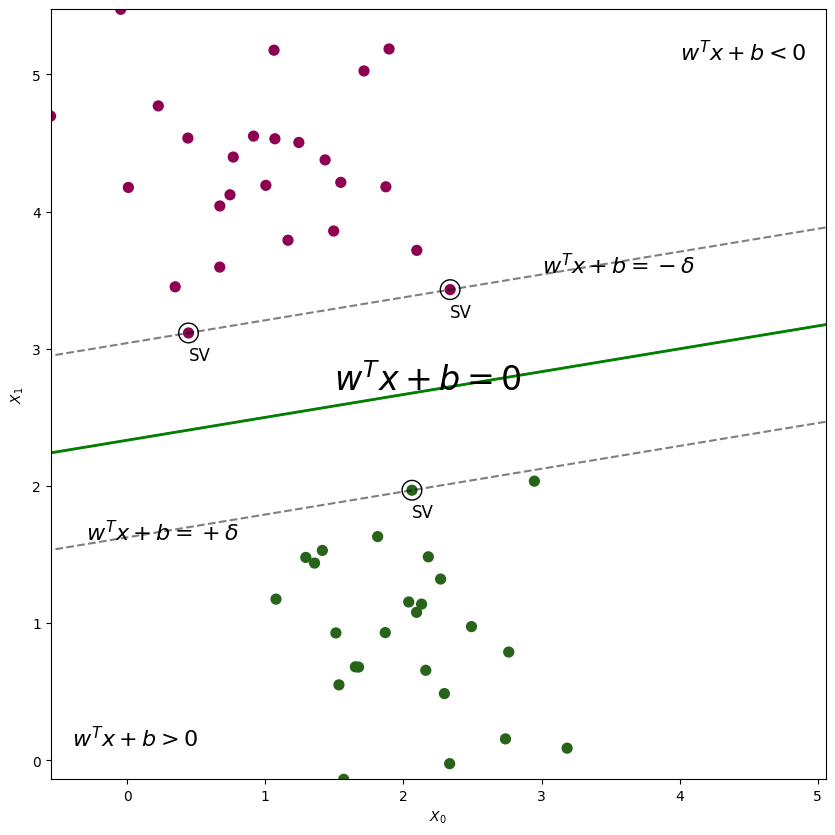

In [43]:
# @title
# figure (need new figure in each new cell)
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('$X_0$')
ax.set_ylabel('$X_1$')

# data
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'PiYG', c = y)

# support vectors
plt.scatter(svc_m.support_vectors_[:, 0],
            svc_m.support_vectors_[:, 1],
            s=200, linewidths=1, edgecolor='k', facecolor="none")

# both 1 and 2 can find separating hyperplane
# 1. find separating hyperplane by contour
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# 2. find separating hyperplane by math
a = -svc_m.coef_[0][0]/svc_m.coef_[0][1]
b = -svc_m.intercept_[0]/svc_m.coef_[0][1]
ax.plot(xx, a*xx+b, 'g', linewidth=2)

# Text
ax.text(1.5, 2.7, "$w^T x + b = 0$", fontsize = 24)
ax.text(4.0, 5.1, "$w^T x + b < 0$", fontsize = 16)
ax.text(-0.4, 0.1, "$w^T x + b > 0$", fontsize = 16)
ax.text(3.0, 3.55, "$w^T x + b = -\delta$", fontsize = 16)
ax.text(-0.3, 1.6, "$w^T x + b = +\delta$", fontsize = 16)
for sv in svc_m.support_vectors_:
  ax.text(sv[0], sv[1]-0.2, "SV", fontsize = 12)

# show
plt.show()

Since we can always devide the above equation by $\delta$, we can simplify the equation as follows.

$\begin{cases}
w^T x^i + b \leq 1 \to y^i = -1\\
w^T x^i + b \geq 1 \to y^i = +1
\end{cases}$

Notw that the data point in the above figure is ($x_0$, $x_1$), and $y$ is the point label (-1 implies purple point; +1 impies green point.)

For simplicity again, we can represent the equation as follows.

$ y^i (w^T x^i + b) \geq 1$

Hint: you have seen something similar in Logistic Regression.



x+ [2.06156753 1.96918596] b
x- [0.44359863 3.11530945]


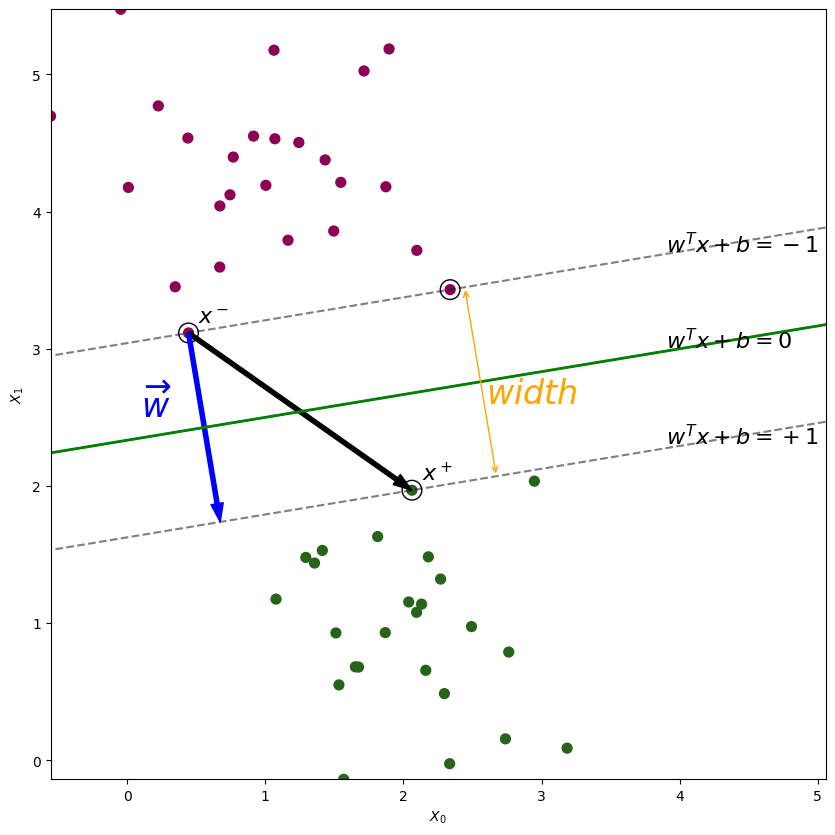

In [44]:
# @title
# figure (need new figure in each new cell)
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('$X_0$')
ax.set_ylabel('$X_1$')

# data
plt.scatter(X[:, 0], X[:, 1], s = 50, cmap = 'PiYG', c = y)

# support vectors
plt.scatter(svc_m.support_vectors_[:, 0],
            svc_m.support_vectors_[:, 1],
            s=200, linewidths=1, edgecolor='k', facecolor="none")

# both 1 and 2 can find separating hyperplane
# 1. find separating hyperplane by contour
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# 2. find separating hyperplane by math
a = -svc_m.coef_[0][0]/svc_m.coef_[0][1]
b = -svc_m.intercept_[0]/svc_m.coef_[0][1]
ax.plot(xx, a*xx+b, 'g', linewidth=2)

# find a x+ and x-
y_ = svc_m.decision_function(X[svc_m.support_])
plus_cord = X[svc_m.support_[list(filter(lambda e: e[1] > 0, enumerate(y_)))[0][0]]]
mius_cord = X[svc_m.support_[list(filter(lambda e: e[1] < 0, enumerate(y_)))[0][0]]]
ax.arrow(mius_cord[0], mius_cord[1],
         plus_cord[0]-mius_cord[0], plus_cord[1]-mius_cord[1],
         width = 0.03, length_includes_head = True, color = 'k')
print("x+", plus_cord, "b", )
print("x-", mius_cord)

# normal vector by math, w dot n = 0
n_a = -1/a # must be -1/a
n_b = mius_cord[1] - (svc_m.coef_[0][1]/svc_m.coef_[0][0])*mius_cord[0]# pass x-
#ax.plot(xx, n_a*xx+n_b, 'b', linewidth=2)

# intersection of normal vector (pass x-) and wTx+b=+1
n_x0 = (1-svc_m.intercept_[0]-svc_m.coef_[0][1]*n_b)/(svc_m.coef_[0][0]+n_a*svc_m.coef_[0][1])
n_x1 = n_a* n_x0 + n_b
ax.arrow(mius_cord[0], mius_cord[1],
         n_x0-mius_cord[0], n_x1-mius_cord[1],
         width = 0.03, length_includes_head = True, color = 'b')

# width line
ax.annotate(text='', xy=(mius_cord[0]+2,mius_cord[1]+2*a),
            xytext=(n_x0+2,n_x1+2*a), arrowprops=dict(arrowstyle='<->', color='orange'))

#ax.arrow(plus_cord[0]+1, plus_cord[1]+a,
#         n_x0-plus_cord[0], n_x1-plus_cord[1],
#         length_includes_head = True, color = 'orange')

# Text
off = 0.07
ax.text(3.9, 3.7, "$w^T x + b = -1$", fontsize = 16)
ax.text(3.9, 3.0, "$w^T x + b = 0$", fontsize = 16)
ax.text(3.9, 2.3, "$w^T x + b = +1$", fontsize = 16)
ax.text(mius_cord[0]+off, mius_cord[1]+off, "$x^-$", fontsize = 16)
ax.text(plus_cord[0]+off, plus_cord[1]+off, "$x^+$", fontsize = 16)
ax.text(0.1, 2.5, "$\overrightarrow{w}$", fontsize = 24, color = "b")
ax.text(2.6, 2.6, "$width$", fontsize = 24, color = "orange")

# show
plt.show()

In [45]:
print(a, b)

0.1665526603382801 2.333680177166994


A key to SVM classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!

### Math

\begin{align}
width  & = \overrightarrow{x^- x^+} \cdot \frac{\overrightarrow{w}}{||\overrightarrow{w}||} \\
& = \frac{1}{||\overrightarrow{w}||} [w^T \cdot (x^+ - x^-)] \\
& = \frac{1}{||\overrightarrow{w}||} [w^T \cdot x^+ - w^T \cdot x^-)] \\
& = \frac{1}{||\overrightarrow{w}||} [(1-b) - (-1-b)] \\
& = \frac{2}{||\overrightarrow{w}||}
\end{align}


If we want max $width$, then we need to find min $||\overrightarrow{w}||$.

Again, for some reason, we find minimal $\frac{1}{2}||\overrightarrow{w}||^2$, which is easier for latter calculation.

Now, we have one constrain $ y^i (w^T x^i + b) \geq 1$, and we would like to find the optimal $w^*$ and $b^*$ to get minimal $\frac{1}{2}||\overrightarrow{w}||^2$.

It is not trival to solve above problem. Fortunately, **Lagrange Multiplier Method** could help ([Wikipedia](https://en.wikipedia.org/wiki/Lagrange_multiplier)). The above problem can be transformed to ...

\begin{align}
\theta^* & = \arg \max_\theta \frac{2}{||\overrightarrow{w}||}\\
& = \arg \min_\theta \frac{1}{2} ||\overrightarrow{w}||^2\\
& = \arg \min_\theta L(w, b, \alpha)
\end{align}

$$L(w, b, \alpha) = \frac{1}{2}||\overrightarrow{w}||^2 - \sum_{i=1}^{n} \alpha_i [y^i (w^T x^i + b) -1] $$

$$ \sum_{i=1}^{n} \alpha_i [y^i (w^T x^i + b) -1] = 0 $$

If $w^*$ and $b^*$ lead to max $\frac{1}{2}||\overrightarrow{w}||^2$, then  there exists $\alpha^*$ such that ($w^*$, $b^*$, $\alpha^*$) is a stationary point for the Lagrange function. Please see wikipedia's figure, and it clearly explains it.

$\alpha_i$ is a newly introduced parameter (Lagrange Multiplier).

$\alpha_i$ =
$\begin{cases}
0, \hspace{1cm} y^i (w^T x^i + b) -1 > 0 \implies \text{other data points} \\
\geq 0, \hspace{0.55cm} y^i (w^T x^i + b) -1 = 0 \implies \text{support vectors} \end{cases}$

Again, by using partial differentiation,  we can find  ($w^*$, $b^*$, $\alpha^*$) and the $width$.


### Library w/ KDDCup99

In [46]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [47]:
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split

X, y = fetch_kddcup99(
    subset="SA", percent10=True, random_state=42, return_X_y=True, as_frame=True
)
y = (y != b"normal.").astype(np.int32)
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

In [48]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [49]:
kddcup99_feature_li = ["srv_count", "count"]

svc_linear_m = SVC(kernel='linear')
svc_linear_m.fit(X[kddcup99_feature_li].values, y)

SVC(kernel='linear')

In [50]:
svc_linear_m.coef_, svc_linear_m.intercept_

(array([[-0.04198632,  0.0483275 ]]), array([-2.22790979]))

In [51]:
test_data_li = [[300, 300], [450, 450]]

predictions = svc_linear_m.predict(test_data_li)
print(predictions)

[0 1]


In [52]:
# Indices of support vectors.
svc_linear_m.support_

array([ 240,  306, 1528, 1977, 2005, 3514, 3651, 4009, 4133, 4608, 5389,
       5470, 6345, 7482, 8022, 8059, 8483, 8888, 8973, 9149, 9562, 9973,
        177,  227,  323,  431, 1525, 2424, 2891, 3060, 3258, 3718, 4014,
       4193, 4201, 4646, 5665, 5900, 7961, 8318, 8784, 8919, 9005, 9500,
       9636], dtype=int32)

In [53]:
# Support vectors.
svc_linear_m.support_vectors_[:10] # only show first 10

array([[  1.,  41.],
       [201., 201.],
       [284., 284.],
       [280., 280.],
       [431., 431.],
       [309., 310.],
       [190., 191.],
       [258., 254.],
       [219., 219.],
       [301., 301.]])

In [54]:
# Number of support vectors for each class.
svc_linear_m.n_support_

array([22, 23], dtype=int32)

In [55]:
# The classes labels.
svc_linear_m.classes_

array([0, 1], dtype=int32)

In [56]:
# Evaluates the decision function for the sample
# The function values are proportional to the distance of the samples X to the separating hyperplane.
svc_linear_m.decision_function(test_data_li)

array([-0.32555481,  0.62562268])

#### Classification Report

In [57]:
from sklearn.metrics import classification_report

y_pred = svc_linear_m.predict(X[kddcup99_feature_li].values)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9727
           1       1.00      0.97      0.98       338

    accuracy                           1.00     10065
   macro avg       1.00      0.99      0.99     10065
weighted avg       1.00      1.00      1.00     10065



#### Confustion Matrix


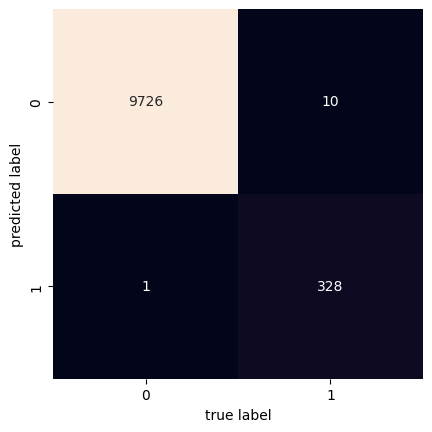

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = svc_linear_m.classes_,
            yticklabels = svc_linear_m.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Support Vector Machine with Kernels



What if a line is not enough?

Where SVM becomes extremely powerful is when it is combined with kernels.

question:  what are the differnet kernel functions in linera regression?

There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In [59]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# SVC
c_X, c_y = make_circles(100, factor=.1, noise=.1)
c_svc_m = SVC(kernel='linear').fit(c_X, c_y)

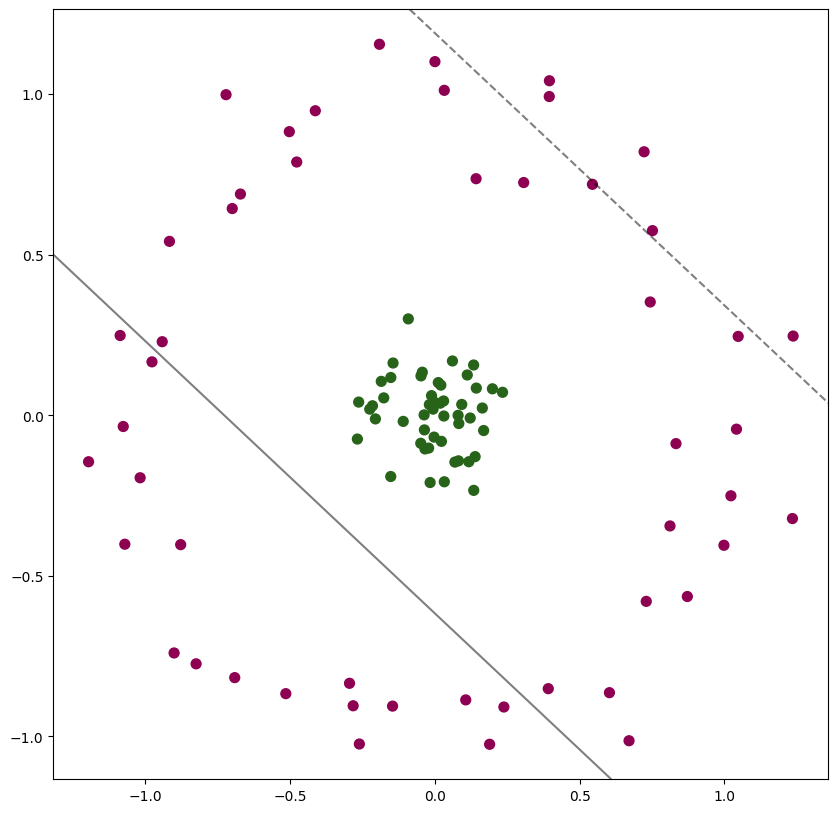

In [60]:
# figure (need new figure in each new cell)
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

# data
ax.scatter(c_X[:, 0], c_X[:, 1], c=c_y, s=50, cmap='PiYG')

# grid
c_xlim = ax.get_xlim()
c_ylim = ax.get_ylim()
c_xx = np.linspace(c_xlim[0], c_xlim[1], 30)
c_yy = np.linspace(c_ylim[0], c_ylim[1], 30)
c_XX, c_YY = np.meshgrid(c_xx, c_yy)
c_xy = np.array(list(zip(c_XX.ravel(), c_YY.ravel())))
c_Z = c_svc_m.decision_function(c_xy).reshape(c_XX.shape)

# find separating hyperplane by contour
ax.contour(c_XX, c_YY, c_Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# show
plt.show()

It is clear that no linear discrimination will ever be able to separate this data.

Think about how we might project the data into a higher dimension such that a linear separator would be sufficient.

For all data points, if there exists a function that
$k(x, y) = \langle\phi(x), \phi(y) \rangle$, then $k(x,y)$ is a kernel function for the dataset. $\langle a, b \rangle$ is dot product. $x$ and $y$ are any two of the data points in the dataset. ($y$ is not target).

Kernel matrix $K \in \mathbb{R}^{n \times n}, K_{i,j} = k(x_i,x_j)$

* Linear kernel: $k(x, y) = \langle x, y \rangle$
* Polynomial kernel: $k(x, y) = (\langle x, y \rangle + c )^{d}, d \in Z^{+}.$ $d$ is degree.
* RBF (radial basis function) kernel : $k(x, y) =  e^{ - \frac{|| x-y ||^2}{2 \sigma^{2}}} = e^{ - \gamma || x-y ||^2}, \sigma \in R-\{0\}, \sigma$ or $\gamma$ is a free parameter.

Example: polynomial kernel function $d=2, c=0$

(Let $x$ and $y$ are two data points in the original space. They have 2 features in this example.)

$k(x, y) = \langle\phi(x), \phi(y) \rangle = (x^T y + 0)^2 $

$x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, y = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$

So, how about $\phi()$?

$k(x, y) = (x_1 y_1 + x_2 y_2)^2 = x_1^2 y_1^2 + x_2^2 y_2^2 + 2 x_1 x_2 y_1 y_2 = \langle\phi(x), \phi(y) \rangle $

$\phi(x) = \begin{bmatrix} x_1^2 \\ x_2^2 \\ \sqrt{2 x_1 x_2} \end{bmatrix}, \phi(y) = \begin{bmatrix} y_1^2 \\ y_2^2 \\ \sqrt{2 y_1 y_2} \end{bmatrix}$

See, we square (d=2) the original feature, the dimension changes to 3. $\phi(*)$ is exctly the mapping (projection) funciton.


Example: RBF kenel function. Taylor series!!!

$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots$

$f(x) = \sum_{n=0}^{\infty}\frac{f^{n}(a)}{n!}(x-a)^n$

$exp(x) = e^x = \sum_{n=0}^{\infty}\frac{x^n}{n!}$

$k(x, y) = \langle\phi(x), \phi(y) \rangle = e^{-\sigma||x-y||^2} = e^{-\sigma (x^2 -2xy +y^2)} = e^{-\sigma (x^2 +y^2)} e^{2\sigma xy} $

$k(x, y) = e^{-\sigma x^2 } e^{-\sigma y^2} [1 + \frac{(2 \sigma xy)^{1}}{1!} + \frac{(2 \sigma xy)^2}{2!} + \frac{(2 \sigma xy)^3}{3!} + \cdots] = e^{-\sigma x^2 } e^{-\sigma y^2} [1 + \sqrt{\frac{2 \sigma}{1!}}x \sqrt{\frac{2 \sigma}{1!}}y + \sqrt{\frac{(2 \sigma)^2}{2!}}x^2 \sqrt{\frac{(2 \sigma)^2}{2!}}y^2 + \sqrt{\frac{(2 \sigma)^3}{3!}}x^3 \sqrt{\frac{(2 \sigma)^3}{3!}}y^3 + \cdots]$

$k(x, y) = \langle\phi(x), \phi(y) \rangle $

So, how about $\phi()$?

$\phi(x) = e^{-\sigma x^2}\begin{bmatrix} 1 \\ \sqrt{\frac{2 \sigma}{1!}}x \\ \sqrt{\frac{(2 \sigma)^2}{1!}}x^2 \\ \sqrt{\frac{(2 \sigma)^3}{3!}}x^3 \\ \vdots \end{bmatrix}, \phi(y) = e^{-\sigma y^2}\begin{bmatrix} 1 \\ \sqrt{\frac{2 \sigma}{1!}}y \\ \sqrt{\frac{(2 \sigma)^2}{1!}}y^2 \\ \sqrt{\frac{(2 \sigma)^3}{3!}}y^3 \\ \vdots \end{bmatrix}$

So, if you want to project the original data points to a higher dimension space ($k$-dimension), you can leverage Taylor series to form the first $k-1$ terms of a Taylor series as your new space.


In [61]:
r = np.exp(-(c_X ** 2).sum(1)) # the first new dimension of rbf (sigma = 1)

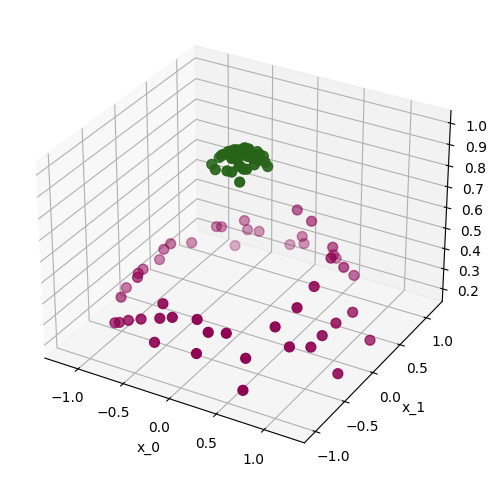

In [62]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='3d')
ax.scatter3D(c_X[:, 0], c_X[:, 1], r, c=c_y, s=50, cmap='PiYG')
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('r')

plt.show()

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane.

Let's try agagin with non-linear kernel.

In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# you should take a look at the default parameters!

rbf_svc_m = SVC(kernel='rbf', C=1E6)
rbf_svc_m.fit(c_X, c_y)

SVC(C=1000000.0)

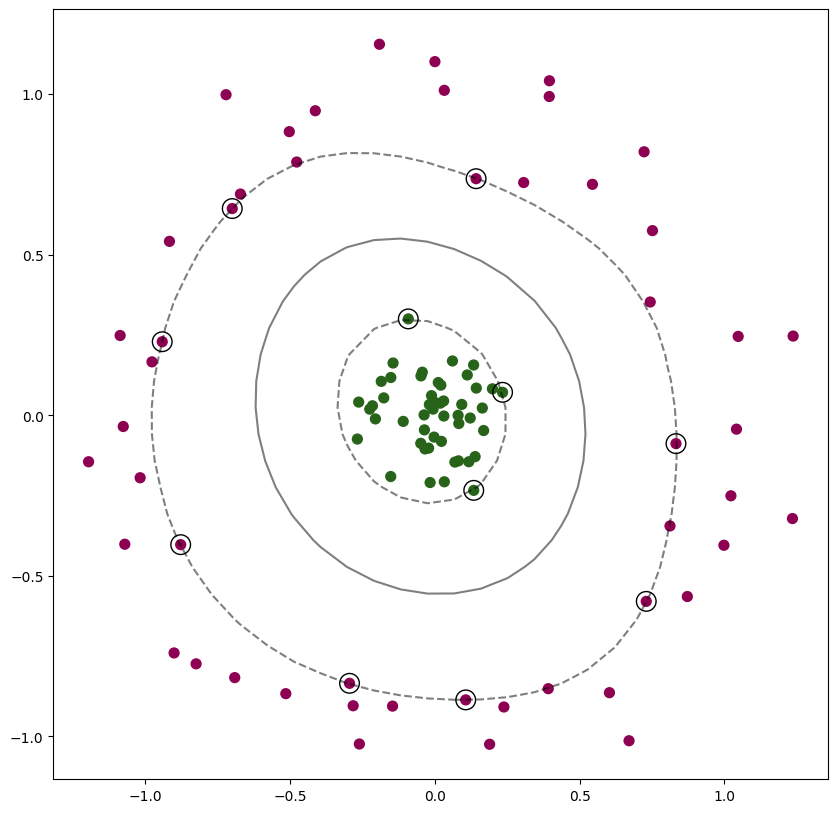

In [64]:
# figure (need new figure in each new cell)
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

# data
ax.scatter(c_X[:, 0], c_X[:, 1], c=c_y, s=50, cmap='PiYG')

# support vectors
plt.scatter(rbf_svc_m.support_vectors_[:, 0],
            rbf_svc_m.support_vectors_[:, 1],
            s=200, linewidths=1, edgecolor='k', facecolor="none")

# grid
rbf_Z = rbf_svc_m.decision_function(c_xy).reshape(c_XX.shape) # < only it matter

# find separating hyperplane by contour
ax.contour(c_XX, c_YY, rbf_Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

# show
plt.show()

### Different Kernels


SVM with polynomial kernel visualization
https://www.youtube.com/watch?v=3liCbRZPrZA


In [65]:
### Different Kernels on iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

h = .02  # step size in the mesh

In [66]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
lin_svc = svm.SVC(kernel='linear').fit(c_X, c_y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(c_X, c_y)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(c_X, c_y)
linsvc = svm.LinearSVC().fit(c_X, c_y)

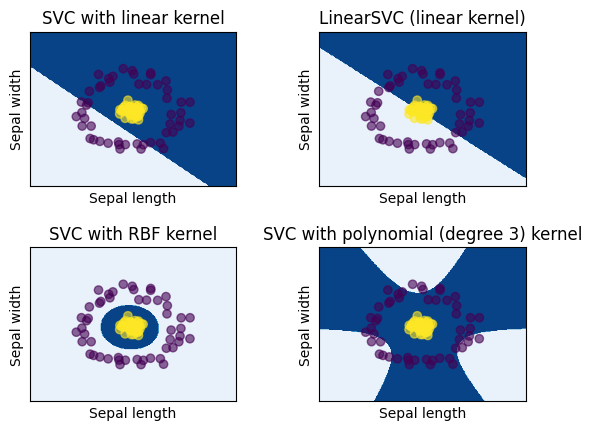

In [67]:
i_x_min, i_x_max = c_X[:, 0].min() - 1, c_X[:, 0].max() + 1
i_y_min, i_y_max = c_X[:, 1].min() - 1, c_X[:, 1].max() + 1
i_xx, i_yy = np.meshgrid(np.arange(i_x_min, i_x_max, h),
                         np.arange(i_y_min, i_y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((lin_svc, linsvc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    i_Z = clf.predict(np.c_[i_xx.ravel(), i_yy.ravel()])

    # Put the result into a color plot
    i_Z = i_Z.reshape(i_xx.shape)
    plt.contourf(i_xx, i_yy, i_Z, cmap=plt.cm.Blues)

    # Plot also the training points
    plt.scatter(c_X[:, 0], c_X[:, 1], c=c_y, alpha=0.6)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(i_xx.min(), i_xx.max())
    plt.ylim(i_yy.min(), i_yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as $C$.

For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer, and can grow to encompass some points.


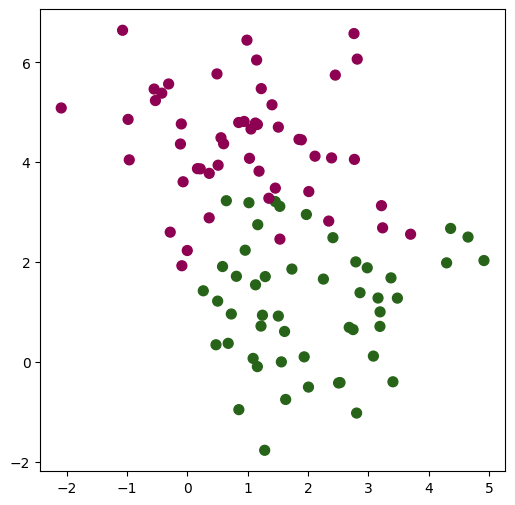

In [68]:
from sklearn.datasets import make_blobs

s_X, s_y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)


fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.scatter(s_X[:, 0], s_X[:, 1], c=s_y, s=50, cmap='PiYG');

# grid
s_xlim = ax.get_xlim()
s_ylim = ax.get_ylim()
s_xx = np.linspace(s_xlim[0], s_xlim[1], 30)
s_yy = np.linspace(s_ylim[0], s_ylim[1], 30)
s_XX, s_YY = np.meshgrid(s_xx, s_yy)
s_xy = np.array(list(zip(s_XX.ravel(), s_YY.ravel())))

plt.show()

In [69]:
scv_largeC = SVC(kernel='linear', C=1e6).fit(s_X, s_y) # 1000000
scv_smallC = SVC(kernel='linear', C=0.1).fit(s_X, s_y)

s_largeC_Z = scv_largeC.decision_function(s_xy).reshape(s_XX.shape)
s_smallC_Z = scv_smallC.decision_function(s_xy).reshape(s_XX.shape)

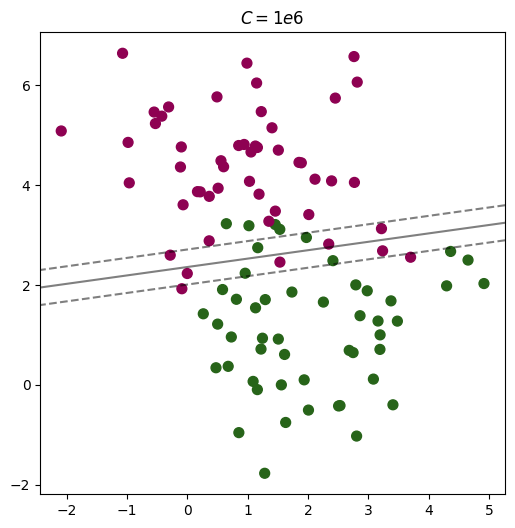

In [70]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

ax.scatter(s_X[:, 0], s_X[:, 1], c=s_y, s=50, cmap='PiYG')
s_Z = scv_largeC.decision_function(s_xy).reshape(s_XX.shape)
ax.contour(s_XX, s_YY, s_largeC_Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

ax.set_title("$C = 1e6$")
plt.show()

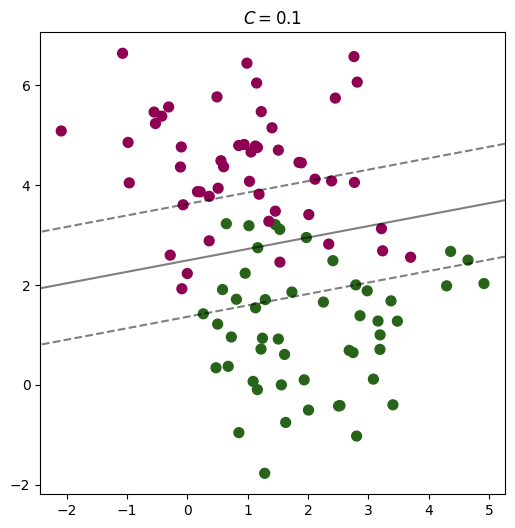

In [71]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

ax.scatter(s_X[:, 0], s_X[:, 1], c=s_y, s=50, cmap='PiYG')
s_Z = scv_smallC.decision_function(s_xy).reshape(s_XX.shape)
ax.contour(s_XX, s_YY, s_smallC_Z, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])
ax.set_title("$C = 0.1$")
plt.show()

Question: larger C needs more computation time?

In a SVM you are searching for two things: a hyperplane with the largest minimum margin, and <b>a hyperplane that correctly separates as many instances as possible</b>. The problem is that you will not always be able to get both things. The c parameter determines how great your desire is for the latter. A low c which gives you a pretty large minimum margin. However, this requires that we **neglect** the outlier that we have failed to classify correct. If you have a large c, you will not neglect the outlier and thus end up with a much smaller margin.

Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

We have seen here a brief intuitive introduction to the principals behind support vector machines. These methods are a powerful classification method for a number of reasons:

* Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
* Once the model is trained, the prediction phase is very fast.
* Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
* Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

*The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
* The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
* The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.
* With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs. Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

# Evaluation

## Classification Matrix


https://en.wikipedia.org/wiki/Confusion_matrix

<table>
<tr><th></th><th></th><th colspan="2" style="text-align:center;">Prediction</th></tr>
<tr><th></th><th></th><th>Class 0 (Negative)</th><th>Class 1 (Positive)</th></tr>
<tr><th rowspan="2"> Actual</th><th>Class 0 (Negative)</td><td>True Negative (TN)</th><td>False Positive (FP)</td></tr>
<tr><th>Class 1 (Positive)</th><td>False Negative (FN)</td><td>True Positive (TP)</td></tr>
</table>

$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}, \text{Error Rate} = 1 - \text{Accuracy}$

$\text{Sensitivity} = \frac{TP}{TP+FN}$, how many traget do the model find?

$\text{Specificity} = \frac{TN}{TN+FP}$, how many non-traget do the model find?

$\text{Precision} = \frac{TP}{TP+FP}$, how precision the model can find target?

$\text{Recall} = \frac{TP}{TP+FN}$, sensitivity.

$F_1 = \frac{1}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}$

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = list(map(lambda x: iris.target_names[x], iris.target))
vv_pl_df = iris_df[(iris_df.target == 'virginica') | (iris_df.target == 'versicolor')]
vv_pl_df = vv_pl_df[['petal length (cm)', 'target']]
vv_pl_df

,petal length (cm),target
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


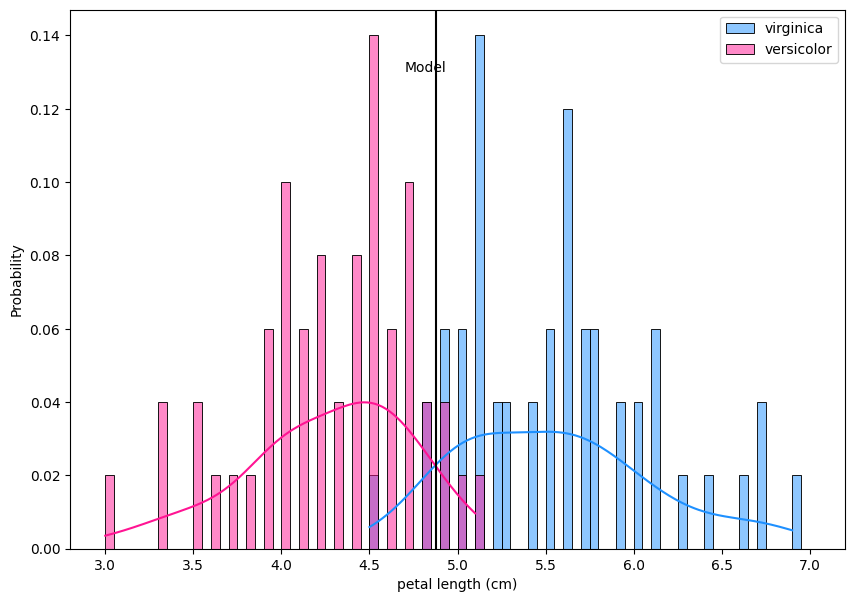

In [73]:
import seaborn as sns
fig = plt.figure(figsize=(10,7))
sns.histplot(vv_pl_df[vv_pl_df.target =='virginica']['petal length (cm)'],
             color="dodgerblue", label="virginica", kde=True,
             binrange = (3.0, 7.0), binwidth = 0.05, stat='probability')
sns.histplot(vv_pl_df[vv_pl_df.target =='versicolor']['petal length (cm)'],
             color="deeppink", label="versicolor", kde=True,
             binrange = (3.0, 7.0), binwidth = 0.05, stat='probability')

# model
plt.axvline(x = 4.875, color = 'black')
plt.text(4.7, 0.13, "Model")

plt.legend()
plt.show()

Quesion: If we try to find 'virginica' (i.e., target is virginica, virginica = +1), where are the TP, TN, FP, FN?

Question: If our model is simple a rule that "If $x > 4.875$, then y = +1", is it the best model?

Question: Which of FN and FP is more important?

Queestion: How do we decrease FN

## ROC (receiver operating characteristic) Curve



In [74]:
vv_pl_df.sort_values(by=['petal length (cm)'], inplace=True)

# for virginica
P = sum(vv_pl_df.target == 'virginica') # count how many 'True's
N = sum(vv_pl_df.target != 'virginica') # count how many not 'True's

roc_li = list()
for model in np.linspace(3.0, 7.0 ,81):
  TP = sum( (vv_pl_df['petal length (cm)'] >= model) & (vv_pl_df.target == 'virginica') )
  FP = sum( (vv_pl_df['petal length (cm)'] >= model) & (vv_pl_df.target != 'virginica') )
  TPR = (TP)/(P)
  FPR = (FP)/(N)
  roc_li.append( [FPR, TPR] )


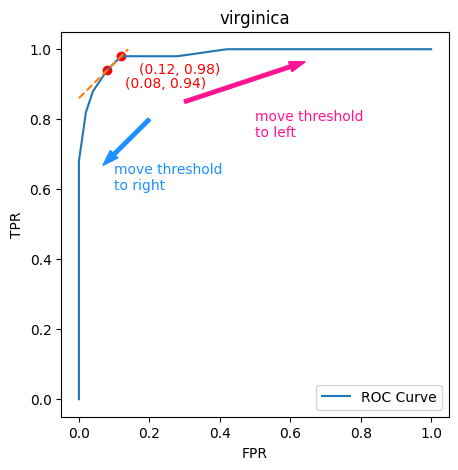

In [75]:
plt.figure(figsize=(5, 5))
# curve
plt.plot(list(map(lambda x: x[0], roc_li)),
         list(map(lambda x: x[1], roc_li)),
         label = "ROC Curve")

# points
shift = 0.05
plt.scatter([0.12, 0.08], [0.98, 0.94], color="red")
plt.text(0.12+shift, 0.98-shift, "(0.12, 0.98)", color="red")
plt.text(0.08+shift, 0.94-shift, "(0.08, 0.94)", color="red")

# 45 degree
s = 0.14
plt.plot([0, s], [1-s, 1], '--')

# arrow
plt.arrow(0.2,0.8, -0.1,-0.1, width = 0.01, color = "dodgerblue")
plt.arrow(0.3,0.85, +0.3,+0.1, width = 0.01, color = "deeppink")
plt.text(0.1, 0.6, "move threshold\nto right", color="dodgerblue")
plt.text(0.5, 0.75, "move threshold\nto left", color="deeppink")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("virginica")
plt.legend()
plt.show()